In [32]:
#Import All the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

In [33]:
#Load the data in the data set
dataSet = pd.read_csv('patient.csv')

In [34]:
dataSet.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [35]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5328 entries, 0 to 5327
Data columns (total 14 columns):
id                  5328 non-null int64
sex                 383 non-null object
birth_year          370 non-null float64
country             5328 non-null object
region              371 non-null object
group               81 non-null object
infection_reason    140 non-null object
infection_order     35 non-null float64
infected_by         70 non-null float64
contact_number      47 non-null float64
confirmed_date      5328 non-null object
released_date       32 non-null object
deceased_date       20 non-null object
state               5328 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 582.8+ KB


In [36]:
dataSet.describe()

,id,birth_year,infection_order,infected_by,contact_number
count,5328.000000,370.000000,35.000000,70.000000,47.000000
mean,2664.500000,1973.589189,2.285714,379.000000,72.978723
std,1538.205448,17.560546,1.405272,540.247528,188.155288
min,1.000000,1932.000000,1.000000,3.000000,0.000000
25%,1332.750000,1960.000000,1.000000,29.250000,2.500000
50%,2664.500000,1974.000000,2.000000,126.000000,16.000000
75%,3996.250000,1987.750000,3.000000,563.250000,46.000000
max,5328.000000,2018.000000,6.000000,2621.000000,1160.000000


In [37]:
#Cleaning the dataSets like removal of the duplicates
dataSet.duplicated().sum()
dataSet.drop_duplicates(inplace=True)

In [38]:
dataSet.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [39]:
#There coluld be many Null values in the data and that could be the reason of slowness.
dataSet.isnull().sum()

id                     0
sex                 4945
birth_year          4958
country                0
region              4957
group               5247
infection_reason    5188
infection_order     5293
infected_by         5258
contact_number      5281
confirmed_date         0
released_date       5296
deceased_date       5308
state                  0
dtype: int64

In [40]:
#Now check the shape of the data
print(dataSet.shape) 

(5328, 14)


In [41]:
#Read the info of the colums 
dataSet.columns

Index(['id', 'sex', 'birth_year', 'country', 'region', 'group',
       'infection_reason', 'infection_order', 'infected_by', 'contact_number',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')

In [42]:
#Check how many Male & Female does exists
dataSet['sex'].value_counts()

female    194
male      189
Name: sex, dtype: int64

In [43]:
#Sex column is a Categorical & here we need to apply encoding technique, female =1 & Male =0
dataSet.sex = dataSet.sex.apply(lambda X : 0 if X == 'female' else 1)

In [44]:
dataSet.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,0,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,1,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,1,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,1,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,1,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [45]:
#Check the statstics summary of the numerical data
dataSet.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5328.0,2664.500000,1538.205448,1.0,1332.75,2664.5,3996.25,5328.0
sex,5328.0,0.963589,0.187329,0.0,1.00,1.0,1.00,1.0
birth_year,370.0,1973.589189,17.560546,1932.0,1960.00,1974.0,1987.75,2018.0
infection_order,35.0,2.285714,1.405272,1.0,1.00,2.0,3.00,6.0
infected_by,70.0,379.000000,540.247528,3.0,29.25,126.0,563.25,2621.0
contact_number,47.0,72.978723,188.155288,0.0,2.50,16.0,46.00,1160.0


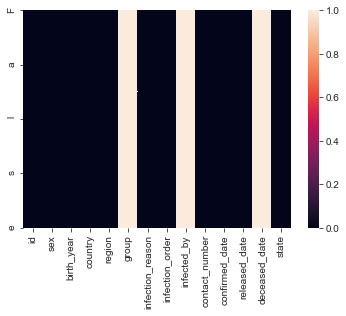

In [46]:
#Plot rectangular data as a color-encoded matrix to find out the null values, wherever is the yellow, data is null there.
sns.heatmap(dataSet.isnull(), yticklabels='False')

Text(0.5, 1.0, 'Regions afftected overall')

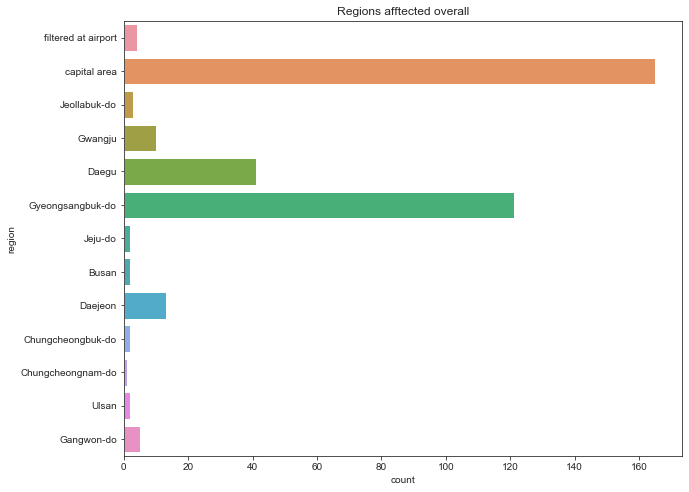

In [47]:
#Plot the graph to know the over all affected people within the region.
plt.figure(figsize=(10,8))
sns.set_style("ticks", {"xtick.major.size":8, "ytick.major.size": 8})

sns.countplot(y=dataSet['region'],).set_title('Regions afftected overall')

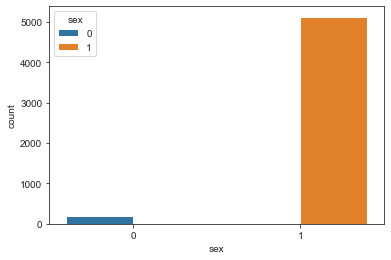

In [48]:
#Check the count of male and female affected by the virous
sns.countplot(x='sex',data=dataSet, hue='sex');


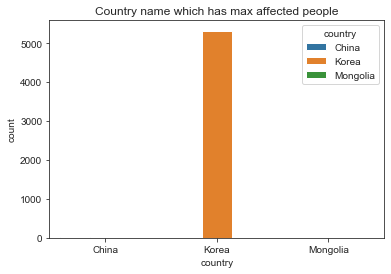

In [49]:
#Also check the country whcih has highest affected people
sns.countplot(x='country', data=dataSet, hue = 'country').set_title('Country name which has max affected people');

Text(0.5, 1.0, 'Area within the country')

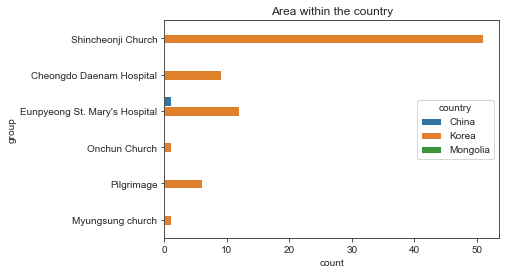

In [50]:
#Calculate the area within the country whcih has affected people
sns.countplot(y='group', data=dataSet, hue = 'country').set_title('Area within the country')

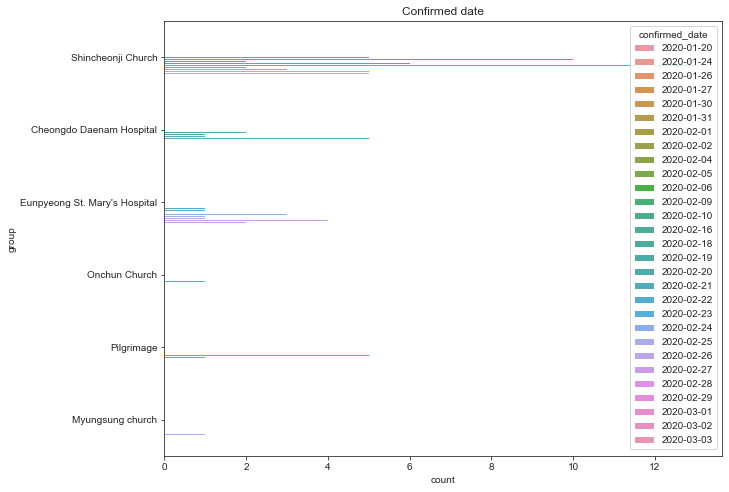

In [51]:
plt.figure(figsize=(10,8))
sns.countplot(y='group',data=dataSet, hue='confirmed_date').set_title('Confirmed date');

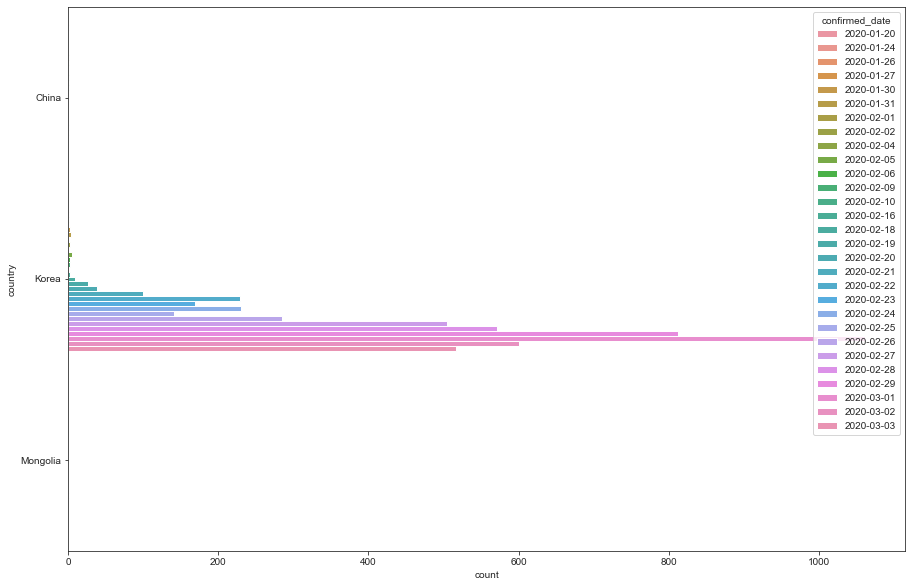

In [52]:
plt.figure(figsize=(15,10))
sns.countplot(y='country',data=dataSet, hue='confirmed_date');

Text(0.5, 1.0, 'Confirmed dates in Korea')

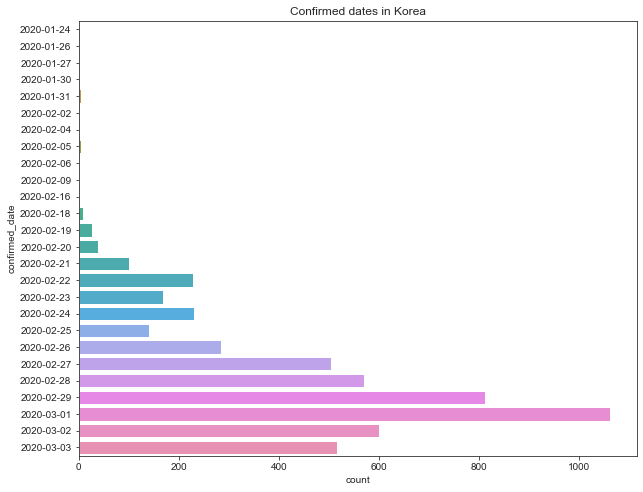

In [53]:
# plot the graph with confirmed date of the human infected or not in the Korea Country
plt.figure(figsize=(10,8))
sns.countplot(y=dataSet['confirmed_date'].loc[(dataSet['country']=="Korea")],).set_title('Confirmed dates in Korea')  


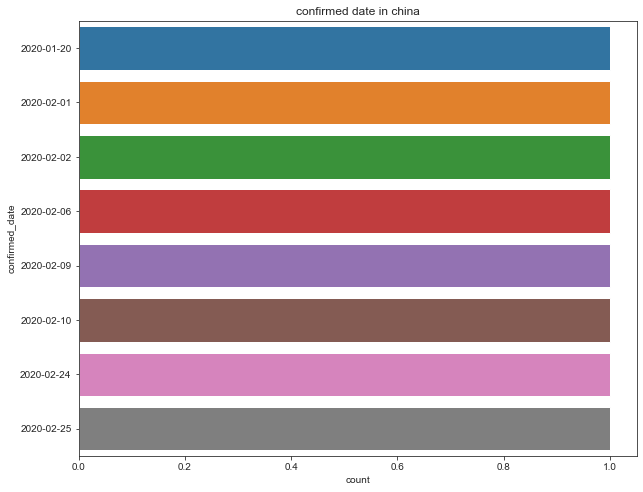

In [54]:
# plot the graph with confirmed date of the human infected or not in the China Country
plt.figure(figsize=(10,8))
sns.countplot(y=dataSet['confirmed_date'].loc[(dataSet['country']=="China")],).set_title('confirmed date in china');

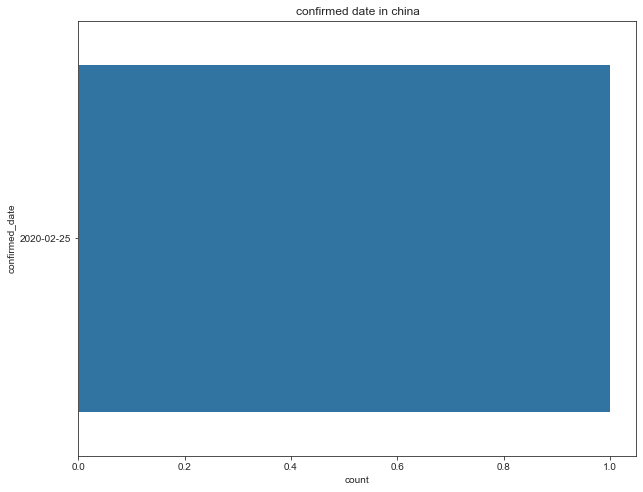

In [55]:
# plot the graph with confirmed date of the human infected or not in the Mongloia Country
plt.figure(figsize=(10,8))
sns.countplot(y=dataSet['confirmed_date'].loc[(dataSet['country']=="Mongolia")],).set_title('confirmed date in china');

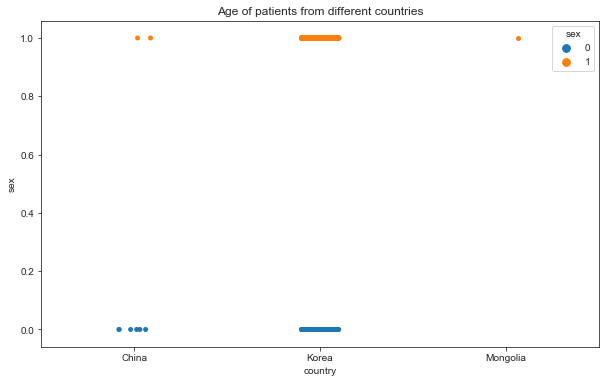

In [56]:
plt.figure(figsize=(10,6))
sns.stripplot(x=dataSet.country, y=dataSet.sex, hue=dataSet.sex)
plt.title("Age of patients from different countries")
plt.show()

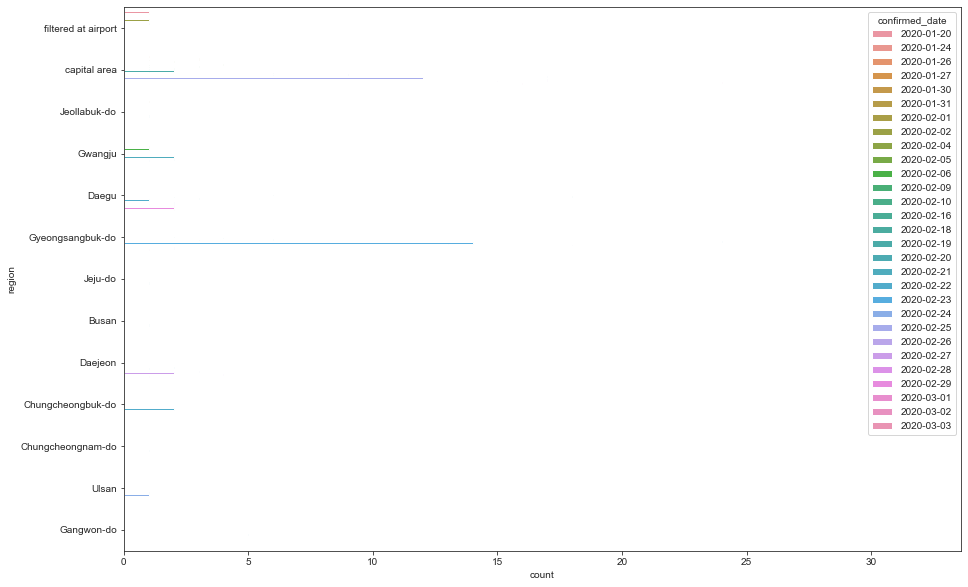

In [57]:

plt.figure(figsize=(15,10))
sns.countplot(y='region',data=dataSet, hue='confirmed_date');

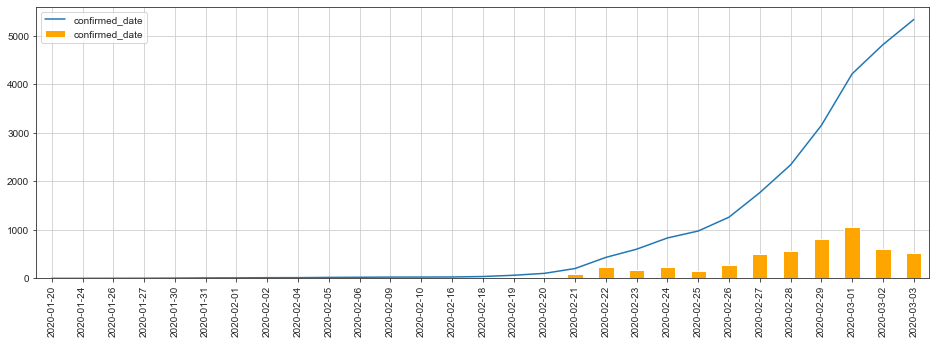

In [58]:
confirmed_patients = dataSet['confirmed_date'].value_counts().sort_index()

confirmed_patients.cumsum().plot(legend='accumulated')
confirmed_patients.plot(kind='bar', color='orange', legend='daily', figsize=(16, 5), grid=True)

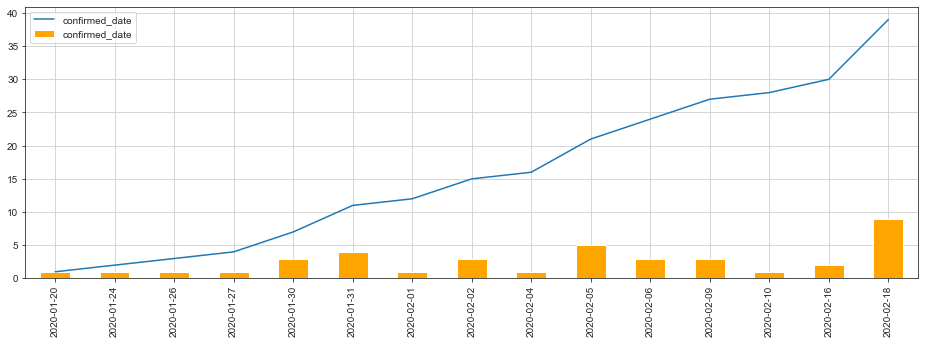

In [61]:
# before no.31 patient confirmed
limit_series = confirmed_patients[:dataSet[dataSet['id'] == 31]['confirmed_date'].values[0]]
limit_series.cumsum().plot(legend='accumulated')
limit_series.plot(kind='bar', color='orange', legend='daily', figsize=(16, 5), grid=True)

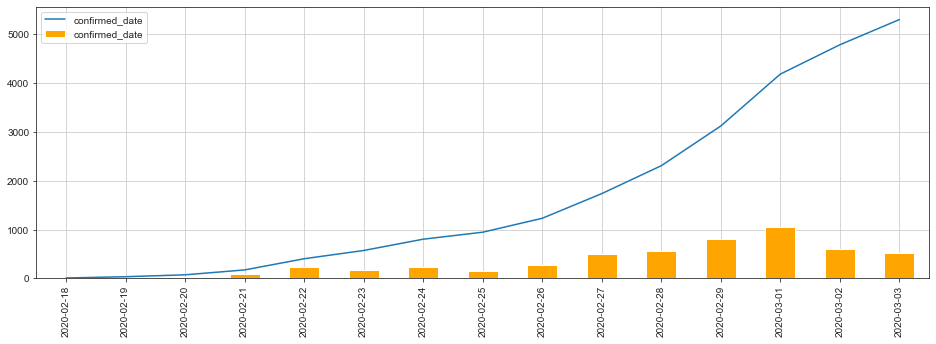

In [62]:
# after no.31 patient confirmed
limit_series = confirmed_patients[dataSet[dataSet['id'] == 31]['confirmed_date'].values[0]:]
limit_series.cumsum().plot(legend='accumulated')
limit_series.plot(kind='bar', color='orange', legend='daily', figsize=(16, 5), grid=True)

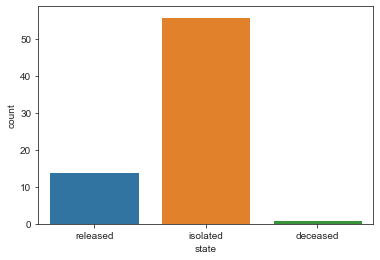

In [63]:
sns.countplot(x=dataSet['state'].loc[(dataSet['infection_reason']=='contact with patient')])

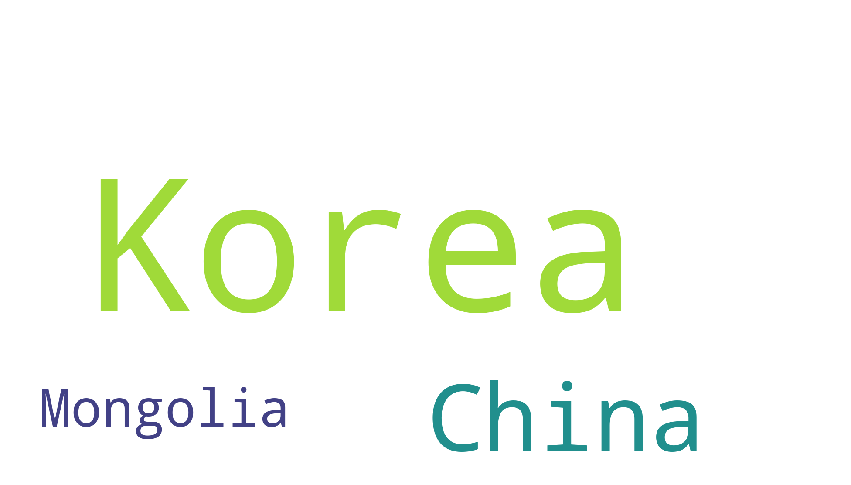

In [65]:
#Using WordCloud to check most frequently country suffered from "Coronavirus" 
plt.subplots(figsize=(15,15)) 
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(dataSet.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()